In [1]:
import pickle
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

### Broad - L200, all genes

In [15]:
dir_in_Lx = '../out/20.0909 Lx/L200only_reg_rf_boruta_all/'
y_compr_tr = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_tr.pkl'), 'rb'))
y_compr_te = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_te.pkl'), 'rb'))

In [51]:
y_compr_tr['actual'].shape

(488, 18141)

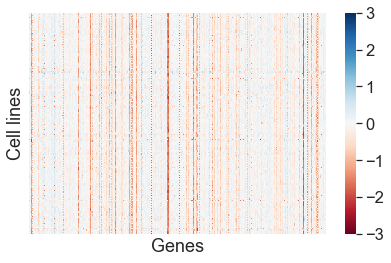

In [48]:
plt.figure()
ax = sns.heatmap(y_compr_te['actual'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

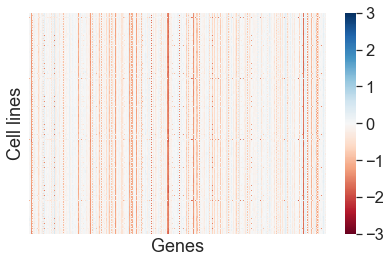

In [49]:
plt.figure()
ax = sns.heatmap(y_compr_te['predicted'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

In [16]:
spearmanr(y_compr_te['actual'].values.flatten(), y_compr_te['predicted'].values.flatten())

SpearmanrResult(correlation=0.8238061122694149, pvalue=0.0)

### Sanger - gs16

In [2]:
dir_in_Lx = '../out/20.0926 feat Sanger/reg_rf_boruta_gs16/'
y_compr_ext = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_ext.pkl'), 'rb'))

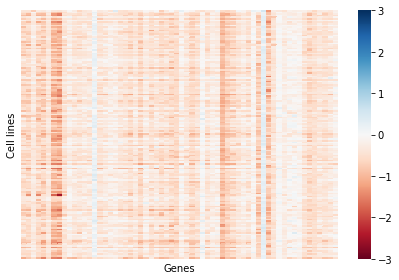

In [21]:
plt.figure()
ax = sns.heatmap(y_compr_ext['actual'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

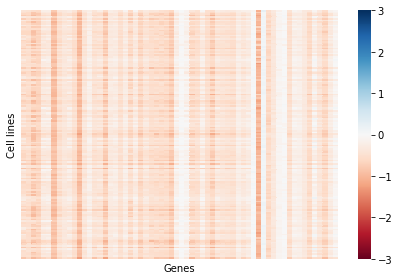

In [22]:
plt.figure()
ax = sns.heatmap(y_compr_ext['predicted'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

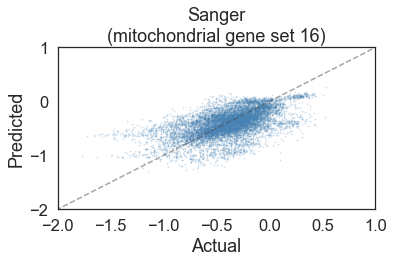

In [41]:
sns.set(font_scale = 1.5)
sns.set_style("white")
plt.figure()
plt.plot([-3,2], [-3,2], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(y_compr_ext['actual'].values.flatten(), y_compr_ext['predicted'].values.flatten(),
                     s = 3, alpha=0.25, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', title='Sanger\n(mitochondrial gene set 16)', xlim=[-2,1], ylim=[-2,1])
plt.tight_layout()

In [14]:
spearmanr(y_compr_ext['actual'].values.flatten(), y_compr_ext['predicted'].values.flatten())

SpearmanrResult(correlation=0.5641557763847358, pvalue=0.0)

### Sanger - L200, all genes

In [52]:
dir_in_Lx = '../out/20.0926 feat Sanger/L200only_reg_rf_boruta_all/'
y_compr_ext = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_ext.pkl'), 'rb'))

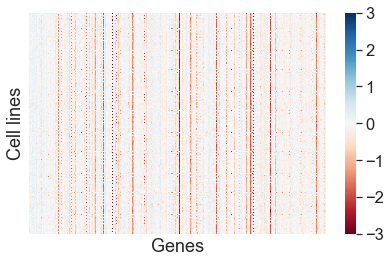

In [53]:
plt.figure()
ax = sns.heatmap(y_compr_ext['actual'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

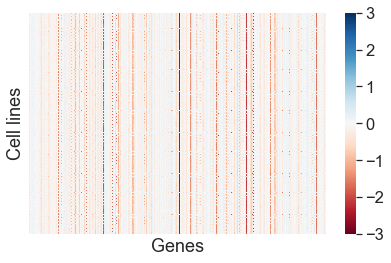

In [54]:
plt.figure()
ax = sns.heatmap(y_compr_ext['predicted'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted'), (-3.0, 2.0), (-3.0, 2.0)]

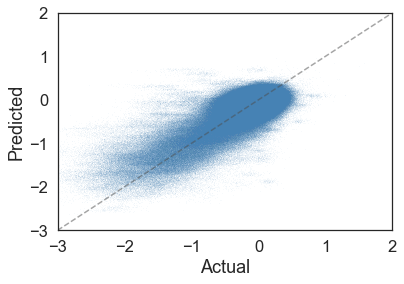

In [70]:
plt.figure()
plt.plot([-3,2], [-3,2], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(y_compr_ext['actual'].values.flatten(), y_compr_ext['predicted'].values.flatten(),
                     s = 1, alpha=0.05, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', xlim=[-3,2], ylim=[-3,2])

### Sanger - L200, gs16

In [71]:
# get the list of gs16 genes
import re
with open('../out/20.0216 feat/reg_rf_boruta/network/gs.txt','r') as f:
    for lines in f:
        if lines.startswith('gene_set_16'):
            l = lines
            gs16 = re.findall(r'\w+', lines)[1:]

In [72]:
dir_in_Lx = '../out/20.0926 feat Sanger/L200only_reg_rf_boruta_all/'
y_compr_ext = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_ext.pkl'), 'rb'))

In [73]:
actual_gs16 = y_compr_ext['actual'].loc[:,y_compr_ext['actual'].columns.isin(gs16)]
predicted_gs16 = y_compr_ext['predicted'].loc[:,y_compr_ext['actual'].columns.isin(gs16)]

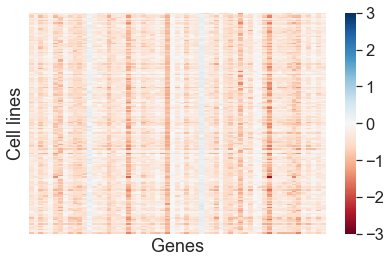

In [74]:
plt.figure()
ax = sns.heatmap(actual_gs16, yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

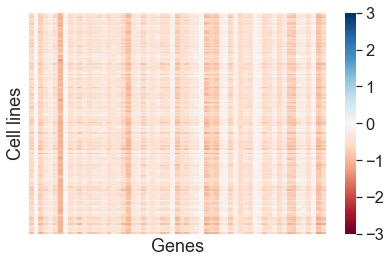

In [75]:
plt.figure()
ax = sns.heatmap(predicted_gs16, yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted'), (-2.0, 1.0), (-2.0, 1.0)]

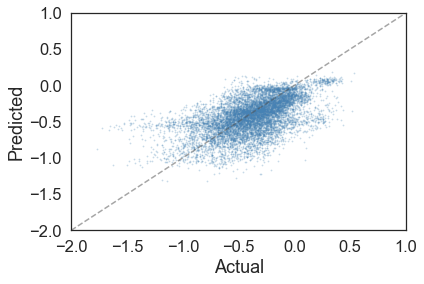

In [80]:
plt.figure()
plt.plot([-2,1], [-2,1], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(actual_gs16.values.flatten(), predicted_gs16.values.flatten(),
                     s = 3, alpha=0.3, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', xlim=[-2,1], ylim=[-2,1])